#Import libraries

In [1]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

#Basic of tf.GradientTape
`tf.GradientTape` allows us to track TensorFlow computations and calculate gradients with respect to some given variables.

#Example 1:

Suppose we have a function $y=x^4$. The first derivative of $y$ with respect to $x$ is 

$y^{'}=\frac{df}{dx}=4x^3$

So if we have $x = 3$, the first derivative calculated at $x=3$ is $108$. Let's use `tf.GradientTape` to calculate this value. 

In [13]:
import tensorflow as tf

# x is a contant of value 3.0
x = tf.constant(3.0)

with tf.GradientTape() as tape:
  # GradientTape doesn’t track constants,
  # so we instruct it to do it with: tape.watch(variable)
  tape.watch(x)
  y = x ** 4 # y = x^4

# Now, calculate the first derivative
grad = tape.gradient(y, x)

# Convert grad to numpy ndarray and print it out
print(grad.numpy())

108.0


#Example 2:

We re-use Example 1 but now $x$ is **not a constant**. We set it to be a variable. Hence, there is no need to instruct `tape` to watch $x$. 

In [14]:
# x is a variable of value 3.0
x = tf.Variable(3.0, trainable = True)

with tf.GradientTape() as tape:
  y = x ** 4 # y = x^4

# Now, calculate the first derivative and print it out
print(tape.gradient(y, x).numpy())

108.0


#Linear Regression with a custom loss function 

## Use `tf.norm(...., ord = 1)`

In [15]:
import random
import numpy as np

# Training set
X_train = np.asarray([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

y_train = np.asarray([x*4 + 10 + np.random.normal(1) for x in X_train]) # y = 4x + 10 + noise

# Above line can be easier to understand in C-like syntax
# y_train = [] # an empty list
# for x in X_train:
#   temp = x*4 + 10 + np.random.normal(1)
#   y_train.append(temp)
# y_train = np.asarray(y_train) # convert the list to numpy array

# custom loss function
def loss_norm1(real_y, pred_y):
    return tf.norm(real_y - pred_y, ord = 1)

# Trainable variables
w = tf.Variable(random.random(), trainable=True)
c = tf.Variable(random.random(), trainable=True)

# Step function
def step(real_X, real_y):
  with tf.GradientTape(persistent = True) as tape:
    
    # This is a linear regression model
    pred_y = w * real_X + c

    # Calculate loss
    reg_loss = loss_norm1(real_y, pred_y)
      
    # Calculate gradients
    w_gradients, c_gradients = tape.gradient(reg_loss, (w, c))

    # Update w and c
    w.assign_sub(w_gradients * 0.001)
    c.assign_sub(c_gradients * 0.001)

# Training loop
for _ in range(2000):
    step(X_train, y_train)

print(f'y ≈ {w.numpy()}x + {c.numpy()}')

w_norm1 = w.numpy()
c_norm1 = c.numpy()

y ≈ 3.983269214630127x + 10.38074779510498


## Activity 1: Use `tf.norm(...., ord = 2)`

In [16]:
# custom loss function
def loss_norm2(real_y, pred_y):
    return tf.norm(real_y - pred_y, ord=2)

# Trainable variables
w = tf.Variable(random.random(), trainable=True)
c = tf.Variable(random.random(), trainable=True)

# Step function
def step(real_X, real_y):
    with tf.GradientTape(persistent = True) as tape:

        # This is a linear regression model
        pred_y = w * real_X + c

        # Calculate loss
        reg_loss = loss_norm2(real_y, pred_y)
    
    # Calculate gradients
    w_gradients, c_gradients = tape.gradient(reg_loss, (w, c))

    # Update w and c
    w.assign_sub(w_gradients * 0.001)
    c.assign_sub(c_gradients * 0.001)

# Training loop
for _ in range(2000):
    step(X_train, y_train)

print(f'y ≈ {w.numpy()}x + {c.numpy()}')

w_norm2 = w.numpy()
c_norm2 = c.numpy()

y ≈ 4.92919921875x + 3.9429104328155518


##Activity 2: Use Huber loss

In [17]:
# custom loss function
def loss_huber(real_y, pred_y, delta):
  t = tf.norm(real_y - pred_y, ord = 1)/real_y.size
  if (t <= delta):
    return 0.5*t^2
  else:
    return delta*(t-0.5*delta)

# Trainable variables
w = tf.Variable(random.random(), trainable=True)
c = tf.Variable(random.random(), trainable=True)

# Step function
def step(real_X, real_y):
    with tf.GradientTape(persistent = True) as tape:

        # This is a linear regression model
        pred_y = w * real_X + c

        # Calculate loss
        reg_loss = loss_huber(real_y, pred_y, 0.1)
    
    # Calculate gradients
    w_gradients, c_gradients = tape.gradient(reg_loss, (w, c))

    # Update m and c
    w.assign_sub(w_gradients * 0.001)
    c.assign_sub(c_gradients * 0.001)

# Training loop
for _ in range(10000):
    step(X_train, y_train)

print(f'y ≈ {w.numpy()}x + {c.numpy()}')

w_huber = w.numpy()
c_huber = c.numpy()

y ≈ 4.959620952606201x + 1.6166175603866577


##Compare three loss functions

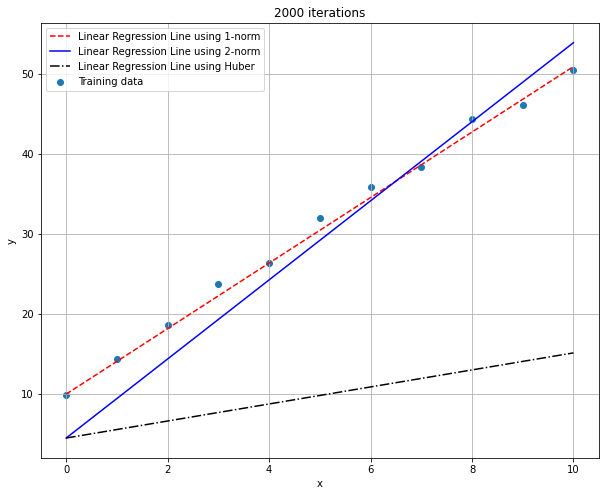

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 8))
plt.scatter(X_train, y_train, label = 'Training data')

x = np.linspace(min(X_train), max(X_train), 100)
y_norm1 = w_norm1*x + c_norm1
y_norm2 = w_norm2*x + c_norm2
y_huber = w_huber*x + c_norm2

plt.plot(x, y_norm1, '--r', label = 'Linear Regression Line using 1-norm')
plt.plot(x, y_norm2,  '-b', label = 'Linear Regression Line using 2-norm')
plt.plot(x, y_huber,  '-.k', label = 'Linear Regression Line using Huber')

plt.title('2000 iterations')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

#MNIST dataset

##Load and preprocess the training data

In [64]:
# Load training data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# X_train: 6000 x 28 x 28

X_train = (X_train / 255).reshape((-1, 28, 28, 1))
# X_train: 6000 x 28 x 28 x 1

y_train = tf.keras.utils.to_categorical(y_train, 10)

X_test = (X_test / 255).reshape((-1, 28, 28, 1))
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [65]:
X_train.shape

(60000, 28, 28, 1)

##Activity 3: Write a function `get_model()` to define your CNN.

Details of the CNN:

- CONV(16 kernels of size (3, 3)) ==> RELU ==> BATCHNORM ==> MAXPOOLING(pool size (2, 2))

- [CONV(32 kernels of size (3, 3)) ==> RELU ==> BATCHNORM] x 2 (times) ==> MAXPOOLING(pool size (2, 2))

- [CONV(64 kernels of size (3, 3)) ==> RELU ==> BATCHNORM] x 3 (times) 

- FLATTEN ==> DENSE ==> DROPOUT (rate = 0.5)

Outout layer: please decide the appropriate information.

In [66]:
def get_model():
  model = Sequential()
  model.add(Conv2D(16, (3,3), input_shape=(28,28,1), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
  model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Dense(10, activation='softmax'))
  

  return model

##Some other hyperparameters

In [67]:
# Hyperparameters
batch_size = 128
epochs = 25

##Activity 4: Use `tf.GradientTape`

In [68]:
# Component 3: an optimizer
# Use Adam with lr = 0.001
optimizer = Adam(learning_rate=0.001)


# Component 1: a model
# Call get_model()
model = get_model()

# Step function
def step(real_X, real_y):
    with tf.GradientTape() as tape:
        # Forward pass
        # Pass the data through the model and obtain the output: pred_y
        pred_y = model(real_X.reshape((-1, 28, 28, 1)))

        # Use pred_y and real_y to calculate the loss function
        # This is Component 2
        # We use the built-in loss function: tf.keras.losses.categorical_crossentropy
        model_loss = tf.keras.losses.categorical_crossentropy(real_y, pred_y)
    
    # Calculate gradients of model_loss with repect to all parameters of the model
    # Use model.trainable_variables as the second input when calling tape.gradient()
    model_gradients = tape.gradient(model_loss, model.trainable_variables)

    # Backward pass
    # Update all parameters of the model
    # Use optimizer.apply_gradients()
    optimizer.apply_gradients(zip(model_gradients, model.trainable_variables))

# Training loop

# Calculate how many sample per batch
batch_per_epoch = math.floor(len(X_train) / batch_size)

for epoch in range(epochs): 
    print('=', epoch+1, end = '')

    for i in range(batch_per_epoch):
        n = i*batch_size

        # Extract each batch by: X_train[n:n+batch_size] and y_train[n:n+batch_size]
        # Pass them to step() function
        step(X_train[n:n+batch_size], y_train[n:n+batch_size])

= 1= 2= 3= 4= 5= 6= 7= 8= 9= 10= 11= 12= 13= 14= 15= 16= 17= 18= 19= 20= 21= 22= 23= 24= 25

In [69]:
X_train.shape

(60000, 28, 28, 1)

In [70]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 batch_normalization_66 (Bat  (None, 28, 28, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 batch_normalization_67 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                     

##Accuracy on the test set

In [71]:
# Calculate accuracy
model.compile(optimizer = optimizer, loss = tf.losses.categorical_crossentropy, metrics = ['acc'])
print('\nAccuracy:', model.evaluate(X_test, y_test, verbose = 0)[1])


Accuracy: 0.9932000041007996
